In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1=pd.read_csv('big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.0/001/Dexcom_001.csv')

In [3]:
data1.head(20)

,Index,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer)
0,1,NaN,FirstName,NaN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,LastName,NaN,001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,PatientIdentifier,NaN,2019-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,DateOfBirth,NaN,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,Device,NaN,NaN,Dexcom G6 Mobile App,iPhone G6,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,Alert,Fall,NaN,NaN,iPhone G6,NaN,NaN,NaN,NaN,3.0,NaN
6,7,NaN,Alert,High,NaN,NaN,iPhone G6,200.0,NaN,NaN,NaN,NaN,NaN
7,8,NaN,Alert,Low,NaN,NaN,iPhone G6,80.0,NaN,NaN,NaN,NaN,NaN
8,9,NaN,Alert,Signal Loss,NaN,NaN,iPhone G6,NaN,NaN,NaN,00:20:00,NaN,NaN
9,10,NaN,Alert,Rise,NaN,NaN,iPhone G6,NaN,NaN,NaN,NaN,3.0,NaN


In [4]:
data1.shape

(2573, 13)

In [5]:
data2=pd.read_csv('big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.0/001/BVP_001.csv')

In [6]:
data2.shape

(40592838, 2)

In [7]:
data1.iloc[12:,:].isnull().sum()

Index                                    0
Timestamp (YYYY-MM-DDThh:mm:ss)          0
Event Type                               0
Event Subtype                         2561
Patient Info                          2561
Device Info                           2561
Source Device ID                         0
Glucose Value (mg/dL)                    0
Insulin Value (u)                     2561
Carb Value (grams)                    2561
Duration (hh:mm:ss)                   2561
Glucose Rate of Change (mg/dL/min)    2561
Transmitter Time (Long Integer)          0
dtype: int64

In [8]:
data2.isnull().sum()

datetime    0
 bvp        0
dtype: int64

In [9]:
data2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40592838 entries, 0 to 40592837
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1    bvp      float64
dtypes: float64(1), object(1)
memory usage: 3.4 GB


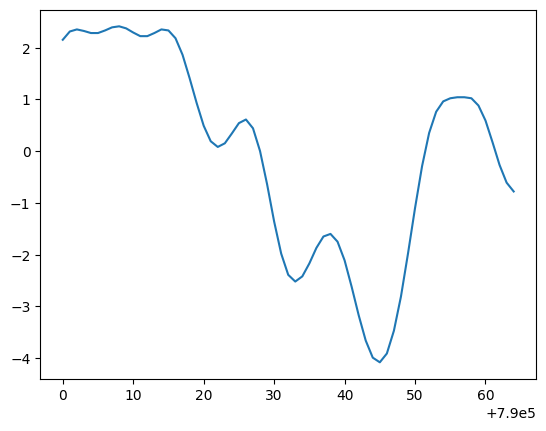

In [11]:
i=790000
plt.plot(data2[[' bvp']][i:i+65])

In [16]:
for row in range(data2[['datetime']].shape[0]):
    data2.iat[row,0]=data2.iat[row,0][:19]

In [17]:
data2

,datetime,bvp
0,2020-02-13 15:28:50,-0.00
1,2020-02-13 15:28:50,-0.00
2,2020-02-13 15:28:50,-0.00
3,2020-02-13 15:28:50,-0.00
4,2020-02-13 15:28:50,-0.00
...,...,...
40592833,2020-02-22 17:56:03,-4.01
40592834,2020-02-22 17:56:03,-4.34
40592835,2020-02-22 17:56:03,-4.25
40592836,2020-02-22 17:56:03,-3.82


In [21]:
indices=[]
timestamps=[]

In [23]:
for row in range(1,data2.shape[0]):
    if data2.iat[row,0]!=data2.iat[row-1,0]:
        indices.append(row)
        timestamps.append(data2.iat[row,0])

In [44]:
finalized_timestamps=[]
finalized_indices=[]

In [45]:
for i in range(1,len(timestamps)):
    if timestamps[i][:16]!=timestamps[i-1][:16]:
        finalized_timestamps.append(timestamps[i])
        finalized_indices.append(indices[i])

In [47]:
len(finalized_timestamps)

10579

In [50]:
finalized_timestamps

['2020-02-13 15:29:00',
 '2020-02-13 15:30:00',
 '2020-02-13 15:31:00',
 '2020-02-13 15:32:00',
 '2020-02-13 15:33:00',
 '2020-02-13 15:34:00',
 '2020-02-13 15:35:00',
 '2020-02-13 15:36:00',
 '2020-02-13 15:37:00',
 '2020-02-13 15:38:00',
 '2020-02-13 15:39:00',
 '2020-02-13 15:40:00',
 '2020-02-13 15:41:00',
 '2020-02-13 15:42:00',
 '2020-02-13 15:43:00',
 '2020-02-13 15:44:00',
 '2020-02-13 15:45:00',
 '2020-02-13 15:46:00',
 '2020-02-13 15:47:00',
 '2020-02-13 15:48:00',
 '2020-02-13 15:49:00',
 '2020-02-13 15:50:00',
 '2020-02-13 15:51:00',
 '2020-02-13 15:52:00',
 '2020-02-13 15:53:00',
 '2020-02-13 15:54:00',
 '2020-02-13 15:55:00',
 '2020-02-13 15:56:00',
 '2020-02-13 15:57:00',
 '2020-02-13 15:58:00',
 '2020-02-13 15:59:00',
 '2020-02-13 16:00:00',
 '2020-02-13 16:01:00',
 '2020-02-13 16:02:00',
 '2020-02-13 16:03:00',
 '2020-02-13 16:04:00',
 '2020-02-13 16:05:00',
 '2020-02-13 16:06:00',
 '2020-02-13 16:07:00',
 '2020-02-13 16:08:00',
 '2020-02-13 16:09:00',
 '2020-02-13 16:

In [75]:
stamp_label=[]
index_label=[]
for i in range(len(finalized_timestamps)):
    for j in range(12,data1.iloc[12:,:].shape[0]+1):
        if finalized_timestamps[i][:16]==data1.iat[j,1][:16]:
            stamp_label.append(finalized_timestamps[i])
            index_label.append(finalized_indices[i])

In [53]:
data1.iat[12,1][:16]

'2020-02-13 17:23'

In [76]:
len(index_label)

2044

In [77]:
index_label

[438400,
 457600,
 476800,
 496000,
 515200,
 534400,
 553600,
 572800,
 592000,
 611200,
 630400,
 649600,
 668800,
 688000,
 707200,
 726400,
 745600,
 764800,
 784000,
 803200,
 822400,
 841600,
 860800,
 880000,
 899200,
 918400,
 937600,
 956800,
 976000,
 995200,
 1014400,
 1033600,
 1052800,
 1072000,
 1091200,
 1110400,
 1129600,
 1148800,
 1168000,
 1187200,
 1206400,
 1225600,
 1244800,
 1264000,
 1283200,
 1302400,
 1321600,
 1340800,
 1360000,
 1379200,
 1398400,
 1417600,
 1436800,
 1456000,
 1475200,
 1494400,
 1513600,
 1532800,
 1552000,
 1571200,
 1590400,
 1609600,
 1628800,
 1648000,
 1667200,
 1686400,
 1705600,
 1724800,
 1744000,
 1763200,
 1782400,
 1801600,
 1820800,
 1840000,
 1859200,
 1878400,
 1897600,
 1916800,
 1936000,
 1955200,
 1974400,
 1993600,
 2012800,
 2032000,
 2051200,
 2070400,
 2089600,
 2108800,
 2128000,
 2147200,
 2166400,
 2185600,
 2204800,
 2224000,
 2243200,
 2262400,
 2281600,
 2300800,
 2320000,
 2339200,
 2358400,
 2377600,
 2396800,


In [78]:
with open(r'/home/vacant/projects/minor/newfile2.txt', 'w') as fp:
    for item in index_label:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [81]:
for item in index_label:
    print(data2.iat[item,0])

2020-02-13 17:23:00
2020-02-13 17:28:00
2020-02-13 17:33:00
2020-02-13 17:38:00
2020-02-13 17:43:00
2020-02-13 17:48:00
2020-02-13 17:53:00
2020-02-13 17:58:00
2020-02-13 18:03:00
2020-02-13 18:08:00
2020-02-13 18:13:00
2020-02-13 18:18:00
2020-02-13 18:23:00
2020-02-13 18:28:00
2020-02-13 18:33:00
2020-02-13 18:38:00
2020-02-13 18:43:00
2020-02-13 18:48:00
2020-02-13 18:53:00
2020-02-13 18:58:00
2020-02-13 19:03:00
2020-02-13 19:08:00
2020-02-13 19:13:00
2020-02-13 19:18:00
2020-02-13 19:23:00
2020-02-13 19:28:00
2020-02-13 19:33:00
2020-02-13 19:38:00
2020-02-13 19:43:00
2020-02-13 19:48:00
2020-02-13 19:53:00
2020-02-13 19:58:00
2020-02-13 20:03:00
2020-02-13 20:08:00
2020-02-13 20:13:00
2020-02-13 20:18:00
2020-02-13 20:23:00
2020-02-13 20:28:00
2020-02-13 20:33:00
2020-02-13 20:38:00
2020-02-13 20:43:00
2020-02-13 20:48:00
2020-02-13 20:53:00
2020-02-13 20:58:00
2020-02-13 21:03:00
2020-02-13 21:08:00
2020-02-13 21:13:00
2020-02-13 21:18:00
2020-02-13 21:23:00
2020-02-13 21:28:00


In [83]:
for item in stamp_label:
    print(item)

2020-02-13 17:23:00
2020-02-13 17:28:00
2020-02-13 17:33:00
2020-02-13 17:38:00
2020-02-13 17:43:00
2020-02-13 17:48:00
2020-02-13 17:53:00
2020-02-13 17:58:00
2020-02-13 18:03:00
2020-02-13 18:08:00
2020-02-13 18:13:00
2020-02-13 18:18:00
2020-02-13 18:23:00
2020-02-13 18:28:00
2020-02-13 18:33:00
2020-02-13 18:38:00
2020-02-13 18:43:00
2020-02-13 18:48:00
2020-02-13 18:53:00
2020-02-13 18:58:00
2020-02-13 19:03:00
2020-02-13 19:08:00
2020-02-13 19:13:00
2020-02-13 19:18:00
2020-02-13 19:23:00
2020-02-13 19:28:00
2020-02-13 19:33:00
2020-02-13 19:38:00
2020-02-13 19:43:00
2020-02-13 19:48:00
2020-02-13 19:53:00
2020-02-13 19:58:00
2020-02-13 20:03:00
2020-02-13 20:08:00
2020-02-13 20:13:00
2020-02-13 20:18:00
2020-02-13 20:23:00
2020-02-13 20:28:00
2020-02-13 20:33:00
2020-02-13 20:38:00
2020-02-13 20:43:00
2020-02-13 20:48:00
2020-02-13 20:53:00
2020-02-13 20:58:00
2020-02-13 21:03:00
2020-02-13 21:08:00
2020-02-13 21:13:00
2020-02-13 21:18:00
2020-02-13 21:23:00
2020-02-13 21:28:00


In [112]:
table=[]
for item in index_label:
    table.append(data2.iloc[item-1280:item+1280,1])

In [111]:
item=11641836
data2.iloc[item-1280:item+1280,1]

11640556   -0.03
11640557   -0.27
11640558   -0.56
11640559   -0.89
11640560   -1.26
            ... 
11643111    0.15
11643112    0.34
11643113    0.38
11643114    0.38
11643115    0.39
Name:  bvp, Length: 2560, dtype: float64

In [113]:
table[5]

533120     5.24
533121     4.54
533122     3.92
533123     3.17
533124     2.08
          ...  
535675   -12.50
535676   -13.14
535677   -13.25
535678   -12.92
535679   -12.35
Name:  bvp, Length: 2560, dtype: float64

In [99]:
stamp_label

['2020-02-13 17:23:00',
 '2020-02-13 17:28:00',
 '2020-02-13 17:33:00',
 '2020-02-13 17:38:00',
 '2020-02-13 17:43:00',
 '2020-02-13 17:48:00',
 '2020-02-13 17:53:00',
 '2020-02-13 17:58:00',
 '2020-02-13 18:03:00',
 '2020-02-13 18:08:00',
 '2020-02-13 18:13:00',
 '2020-02-13 18:18:00',
 '2020-02-13 18:23:00',
 '2020-02-13 18:28:00',
 '2020-02-13 18:33:00',
 '2020-02-13 18:38:00',
 '2020-02-13 18:43:00',
 '2020-02-13 18:48:00',
 '2020-02-13 18:53:00',
 '2020-02-13 18:58:00',
 '2020-02-13 19:03:00',
 '2020-02-13 19:08:00',
 '2020-02-13 19:13:00',
 '2020-02-13 19:18:00',
 '2020-02-13 19:23:00',
 '2020-02-13 19:28:00',
 '2020-02-13 19:33:00',
 '2020-02-13 19:38:00',
 '2020-02-13 19:43:00',
 '2020-02-13 19:48:00',
 '2020-02-13 19:53:00',
 '2020-02-13 19:58:00',
 '2020-02-13 20:03:00',
 '2020-02-13 20:08:00',
 '2020-02-13 20:13:00',
 '2020-02-13 20:18:00',
 '2020-02-13 20:23:00',
 '2020-02-13 20:28:00',
 '2020-02-13 20:33:00',
 '2020-02-13 20:38:00',
 '2020-02-13 20:43:00',
 '2020-02-13 20:

In [116]:
table=np.array(table)

In [117]:
table.shape

(2044, 2560)

In [125]:
df=pd.DataFrame(table)

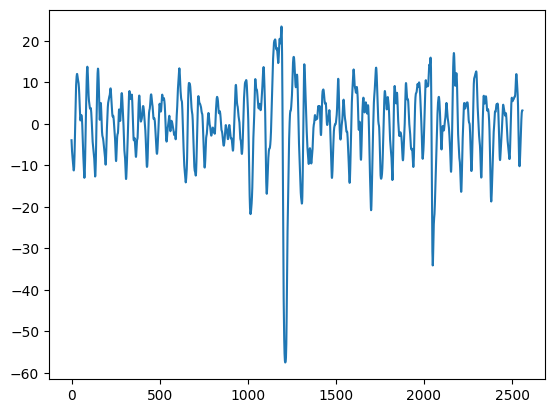

In [163]:
i=0
plt.plot(df.iloc[i:i+1,0:2560].values.reshape(2560,1))

In [164]:
from scipy.signal import savgol_filter

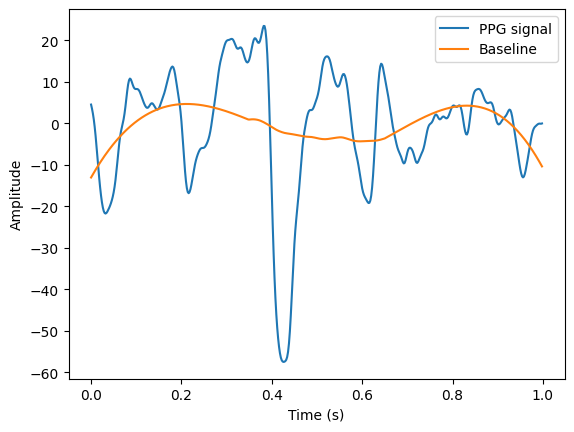

In [220]:
baseline = savgol_filter(ppg, window_length=350, polyorder=3)
fs = 500  # sampling frequency
t = np.arange(0, 1, 1/fs)
# Plot the original signal and the extracted baseline
import matplotlib.pyplot as plt
plt.plot(t, ppg, label='PPG signal')
plt.plot(t, baseline, label='Baseline')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [221]:
new=ppg-baseline

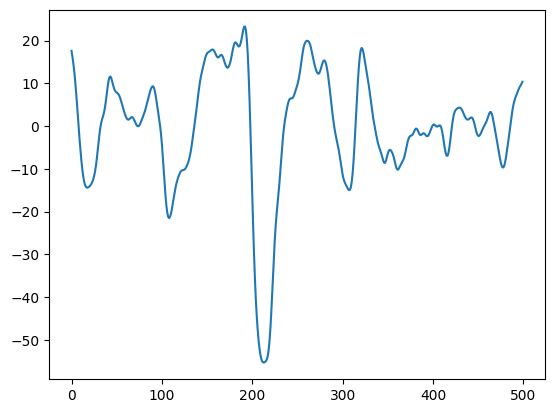

In [222]:
plt.plot(new[:])

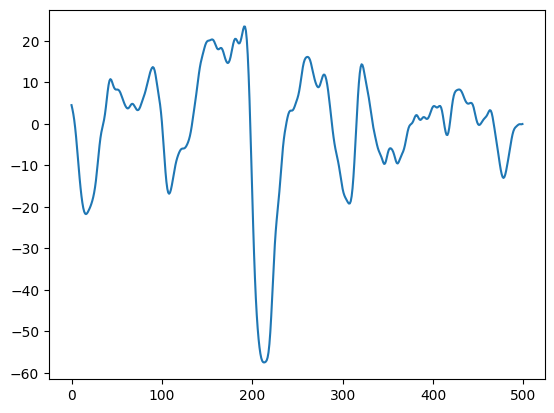

In [207]:
plt.plot(ppg)

In [205]:
ppg=df.iloc[i:i+1,1000:1500].values.reshape(500,1)

In [206]:
ppg=np.ravel(ppg)

In [137]:
df

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,-3.92,-4.90,-5.78,-6.56,-7.20,-7.74,-8.22,-8.71,-9.25,-9.82,...,-2.34,-1.16,-0.02,1.03,1.94,2.62,3.04,3.24,3.28,3.26
1,-13.85,-8.56,-3.97,-0.17,2.94,5.58,7.97,10.28,12.55,14.70,...,-13.49,-12.11,-10.65,-8.99,-6.92,-4.26,-1.00,2.70,6.51,10.12
2,-17.37,-16.58,-15.27,-13.65,-11.90,-10.14,-8.34,-6.43,-4.33,-2.03,...,-6.90,-9.97,-12.35,-13.94,-14.82,-15.13,-14.99,-14.43,-13.49,-12.15
3,9.43,8.25,8.02,8.84,10.43,12.32,13.94,14.81,14.53,12.85,...,52.25,51.70,49.10,45.16,40.83,36.91,33.70,30.88,27.68,23.35
4,25.46,23.70,20.78,16.59,11.27,5.26,-0.80,-6.25,-10.53,-13.36,...,5.36,4.42,3.74,3.40,3.33,3.32,3.12,2.57,1.68,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,-1.93,-3.13,-4.12,-4.78,-5.08,-5.16,-5.21,-5.38,-5.72,-6.16,...,-4.45,-3.88,-3.09,-2.12,-1.00,0.21,1.41,2.50,3.36,3.91
2040,2.64,2.56,2.45,2.29,2.09,1.93,1.87,1.91,1.93,1.73,...,0.31,0.47,0.43,0.25,0.07,0.01,0.09,0.21,0.24,0.06
2041,-1.47,-2.38,-3.10,-3.59,-3.89,-4.05,-4.13,-4.16,-4.13,-4.07,...,-0.56,0.08,0.73,1.34,1.91,2.42,2.90,3.34,3.68,3.82
2042,3.49,3.11,2.70,2.25,1.79,1.40,1.12,1.03,1.10,1.28,...,2.39,2.43,2.26,1.92,1.49,1.06,0.64,0.25,-0.09,-0.33


In [ ]:
for j in range(12,data1.iloc[12:,:].shape[0]+1)

In [154]:
match_val=[]
for item1 in stamp_label:
    for j in range(12,data1.iloc[12:,:].shape[0]+1):
        if item1[:17]==data1.iat[j,1][:17]:
            match_val.append(data1.iat[j,7])

In [156]:
len(match_val)

2044

In [143]:
data1.iloc[12:,1].to_list()

['2020-02-13 17:23:32',
 '2020-02-13 17:28:32',
 '2020-02-13 17:33:32',
 '2020-02-13 17:38:32',
 '2020-02-13 17:43:31',
 '2020-02-13 17:48:31',
 '2020-02-13 17:53:31',
 '2020-02-13 17:58:31',
 '2020-02-13 18:03:32',
 '2020-02-13 18:08:32',
 '2020-02-13 18:13:32',
 '2020-02-13 18:18:32',
 '2020-02-13 18:23:32',
 '2020-02-13 18:28:31',
 '2020-02-13 18:33:31',
 '2020-02-13 18:38:32',
 '2020-02-13 18:43:32',
 '2020-02-13 18:48:32',
 '2020-02-13 18:53:32',
 '2020-02-13 18:58:32',
 '2020-02-13 19:03:31',
 '2020-02-13 19:08:31',
 '2020-02-13 19:13:32',
 '2020-02-13 19:18:32',
 '2020-02-13 19:23:31',
 '2020-02-13 19:28:31',
 '2020-02-13 19:33:32',
 '2020-02-13 19:38:31',
 '2020-02-13 19:43:32',
 '2020-02-13 19:48:32',
 '2020-02-13 19:53:31',
 '2020-02-13 19:58:31',
 '2020-02-13 20:03:32',
 '2020-02-13 20:08:32',
 '2020-02-13 20:13:32',
 '2020-02-13 20:18:32',
 '2020-02-13 20:23:31',
 '2020-02-13 20:28:31',
 '2020-02-13 20:33:31',
 '2020-02-13 20:38:32',
 '2020-02-13 20:43:31',
 '2020-02-13 20:

In [158]:
df['glucose_value']=match_val

In [159]:
df

,0,1,2,3,4,5,6,7,8,9,...,2551,2552,2553,2554,2555,2556,2557,2558,2559,glucose_value
0,-3.92,-4.90,-5.78,-6.56,-7.20,-7.74,-8.22,-8.71,-9.25,-9.82,...,-1.16,-0.02,1.03,1.94,2.62,3.04,3.24,3.28,3.26,61.0
1,-13.85,-8.56,-3.97,-0.17,2.94,5.58,7.97,10.28,12.55,14.70,...,-12.11,-10.65,-8.99,-6.92,-4.26,-1.00,2.70,6.51,10.12,59.0
2,-17.37,-16.58,-15.27,-13.65,-11.90,-10.14,-8.34,-6.43,-4.33,-2.03,...,-9.97,-12.35,-13.94,-14.82,-15.13,-14.99,-14.43,-13.49,-12.15,58.0
3,9.43,8.25,8.02,8.84,10.43,12.32,13.94,14.81,14.53,12.85,...,51.70,49.10,45.16,40.83,36.91,33.70,30.88,27.68,23.35,59.0
4,25.46,23.70,20.78,16.59,11.27,5.26,-0.80,-6.25,-10.53,-13.36,...,4.42,3.74,3.40,3.33,3.32,3.12,2.57,1.68,0.61,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,-1.93,-3.13,-4.12,-4.78,-5.08,-5.16,-5.21,-5.38,-5.72,-6.16,...,-3.88,-3.09,-2.12,-1.00,0.21,1.41,2.50,3.36,3.91,125.0
2040,2.64,2.56,2.45,2.29,2.09,1.93,1.87,1.91,1.93,1.73,...,0.47,0.43,0.25,0.07,0.01,0.09,0.21,0.24,0.06,127.0
2041,-1.47,-2.38,-3.10,-3.59,-3.89,-4.05,-4.13,-4.16,-4.13,-4.07,...,0.08,0.73,1.34,1.91,2.42,2.90,3.34,3.68,3.82,129.0
2042,3.49,3.11,2.70,2.25,1.79,1.40,1.12,1.03,1.10,1.28,...,2.43,2.26,1.92,1.49,1.06,0.64,0.25,-0.09,-0.33,130.0


In [161]:
df.to_csv('001.csv')

In [160]:
import os
os.chdir('extracted_data/')

In [21]:
data1.iloc[12:,:].head(2573)

,Index,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer)
12,13,2020-02-13 17:23:32,EGV,NaN,NaN,NaN,iPhone G6,61.0,NaN,NaN,NaN,NaN,11101.0
13,14,2020-02-13 17:28:32,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,11401.0
14,15,2020-02-13 17:33:32,EGV,NaN,NaN,NaN,iPhone G6,58.0,NaN,NaN,NaN,NaN,11701.0
15,16,2020-02-13 17:38:32,EGV,NaN,NaN,NaN,iPhone G6,59.0,NaN,NaN,NaN,NaN,12001.0
16,17,2020-02-13 17:43:31,EGV,NaN,NaN,NaN,iPhone G6,63.0,NaN,NaN,NaN,NaN,12301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2568,2569,2020-02-22 17:33:23,EGV,NaN,NaN,NaN,iPhone G6,139.0,NaN,NaN,NaN,NaN,789294.0
2569,2570,2020-02-22 17:38:23,EGV,NaN,NaN,NaN,iPhone G6,141.0,NaN,NaN,NaN,NaN,789594.0
2570,2571,2020-02-22 17:43:23,EGV,NaN,NaN,NaN,iPhone G6,143.0,NaN,NaN,NaN,NaN,789894.0
2571,2572,2020-02-22 17:48:22,EGV,NaN,NaN,NaN,iPhone G6,139.0,NaN,NaN,NaN,NaN,790194.0


In [208]:
data1.iat[12,1][:19]

'2020-02-13 17:23:32'

In [79]:
data2.iat[10000,0].startswith('2020-02-13 17:28:')

False

In [152]:
data2.iat[10000,0]

'2020-02-13 15:31:26.250000'

In [82]:
import numpy as np
focus=np.array(focus)

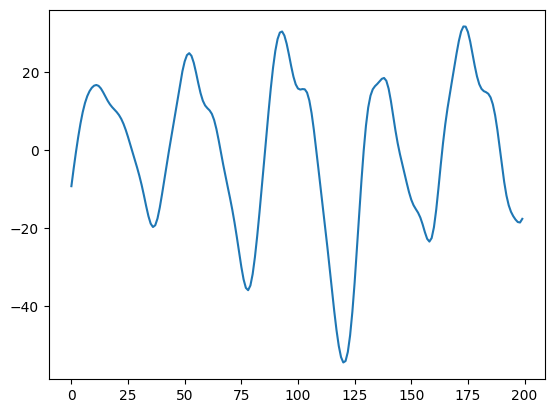

In [85]:
plt.plot(focus[100:300])

In [90]:
data1.iat[1000,1][:18]

'2020-02-17 03:48:2'

In [92]:
focus=np.array(focus)

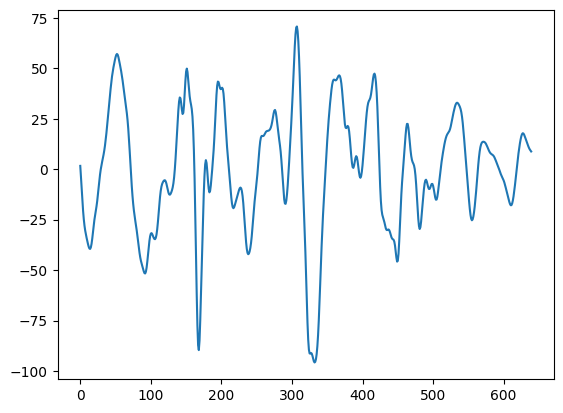

In [99]:
plt.plot(focus)

In [104]:
data1.iloc[12:,1]

12      2020-02-13 17:23:32
13      2020-02-13 17:28:32
14      2020-02-13 17:33:32
15      2020-02-13 17:38:32
16      2020-02-13 17:43:31
               ...         
2568    2020-02-22 17:33:23
2569    2020-02-22 17:38:23
2570    2020-02-22 17:43:23
2571    2020-02-22 17:48:22
2572    2020-02-22 17:53:23
Name: Timestamp (YYYY-MM-DDThh:mm:ss), Length: 2561, dtype: object

In [202]:
for j in range(13,2573):
#     if (int(data1.iat[j,1][14:16])-int(data1.iat[j-1,1][14:16]))!=5:
        print(j)

13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284

In [199]:
data1.iat[505,1][14:16]
data1.iat[504,1][14:16]


'28'

In [182]:
np.abs(4-10)

6

In [105]:
2572-11

2561

In [116]:
import datetime 

In [118]:
t1=datetime.datetime.strptime('2020-02-22 17:38:23' , '%Y-%m-%d %H:%M:%S')

In [119]:
t1

datetime.datetime(2020, 2, 22, 17, 38, 23)

In [123]:
t2=datetime.datetime.strptime('2020-02-17 19:45:55', '%Y-%m-%d %H:%M:%S')

In [124]:
t2

datetime.datetime(2020, 2, 17, 19, 45, 55)

In [125]:
t2>t1

False

In [128]:
t3=t1-t2

In [129]:
t3

datetime.timedelta(days=4, seconds=78748)

In [130]:
data1.iloc[12:,:].shape[0]

2561

In [133]:
i=10000
j=1000
data2.iat[i,0].startswith(data1.iat[j,1][:18])

False

In [221]:
t2=datetime.datetime.strptime('2020-02-13 15:28:50' , '%Y-%m-%d %H:%M:%S')
t1=datetime.datetime.strptime('2020-02-22 17:53:23' , '%Y-%m-%d %H:%M:%S')
(t1-t2).total_seconds()

786273.0

In [156]:
j=10
i=640*j
data2.iloc[i-640:i+640]

,datetime,bvp
5760,2020-02-13 15:30:20.000000,-5.04
5761,2020-02-13 15:30:20.015625,-4.46
5762,2020-02-13 15:30:20.031250,-4.23
5763,2020-02-13 15:30:20.046875,-4.33
5764,2020-02-13 15:30:20.062500,-4.64
...,...,...
7035,2020-02-13 15:30:39.921875,-6.57
7036,2020-02-13 15:30:39.937500,-6.48
7037,2020-02-13 15:30:39.953125,-5.88
7038,2020-02-13 15:30:39.968750,-4.83


In [192]:
5%2

1

In [212]:
6882*64

440448

In [215]:
data2.iloc[440448:,:]

,datetime,bvp
440448,2020-02-13 17:23:32.000000,0.73
440449,2020-02-13 17:23:32.015625,1.81
440450,2020-02-13 17:23:32.031250,2.86
440451,2020-02-13 17:23:32.046875,3.79
440452,2020-02-13 17:23:32.062500,4.55
...,...,...
40592833,2020-02-22 17:56:03.718750,-4.01
40592834,2020-02-22 17:56:03.734375,-4.34
40592835,2020-02-22 17:56:03.750000,-4.25
40592836,2020-02-22 17:56:03.765625,-3.82


In [217]:
7182*64

459648

In [228]:
data2.iloc[:,:]

,datetime,bvp
0,2020-02-13 15:28:50.000000,-0.00
1,2020-02-13 15:28:50.015625,-0.00
2,2020-02-13 15:28:50.031250,-0.00
3,2020-02-13 15:28:50.046875,-0.00
4,2020-02-13 15:28:50.062500,-0.00
...,...,...
40592833,2020-02-22 17:56:03.718750,-4.01
40592834,2020-02-22 17:56:03.734375,-4.34
40592835,2020-02-22 17:56:03.750000,-4.25
40592836,2020-02-22 17:56:03.765625,-3.82


In [227]:
data2.iloc[50321408:,:]

,datetime,bvp


In [223]:
786273*64

50321472

In [226]:
786272*64

50321408

In [236]:
t2=datetime.datetime.strptime('2020-02-13 15:28:50' , '%Y-%m-%d %H:%M:%S')
t1=datetime.datetime.strptime('2020-02-13 15:29:50' , '%Y-%m-%d %H:%M:%S')
(t1-t2).total_seconds()

60.0

In [237]:
60*64

3840

In [276]:
i=2332
data2.iloc[i*3840:(i+1)*3840,:]

,datetime,bvp
8954880,2020-02-15 06:20:50.000000,-1.40
8954881,2020-02-15 06:20:50.015625,-1.01
8954882,2020-02-15 06:20:50.031250,-0.87
8954883,2020-02-15 06:20:50.046875,-1.16
8954884,2020-02-15 06:20:50.062500,-1.87
...,...,...
8958715,2020-02-15 09:27:06.703125,-305.03
8958716,2020-02-15 09:27:06.718750,-229.26
8958717,2020-02-15 09:27:06.734375,-144.73
8958718,2020-02-15 09:27:06.750000,-53.85


In [295]:
i=2333
data2.iloc[i*3840+14:(i+1)*3840,:]

,datetime,bvp
8958734,2020-02-15 09:27:07.000000,170.90
8958735,2020-02-15 09:27:07.015625,131.26
8958736,2020-02-15 09:27:07.031250,100.00
8958737,2020-02-15 09:27:07.046875,71.61
8958738,2020-02-15 09:27:07.062500,41.96
...,...,...
8962555,2020-02-15 09:28:06.703125,6.15
8962556,2020-02-15 09:28:06.718750,6.03
8962557,2020-02-15 09:28:06.734375,5.46
8962558,2020-02-15 09:28:06.750000,4.47


In [281]:
2333

2333

In [13]:
data1=data1.iloc[12:,:]

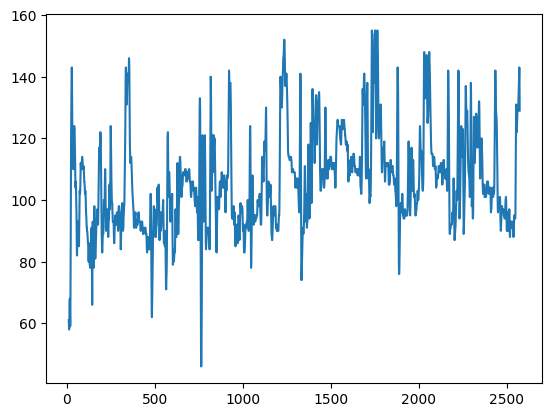

In [18]:
plt.plot(data1['Glucose Value (mg/dL)'])